# 1. 데이터 구조 확인
- 처음 파일인 2015년01월 파일로 데이터 구조 및 정보 확인

In [1]:
import pandas as pd

In [2]:
df_20151 = pd.read_excel('entrance_file_excel/entrance_2015_01.xlsx', usecols = 'B:H', header = 1)
df_20151.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,국적별(2),계,관광,상용,공용,유학연수,기타
0,소계,763151,633146,12391,1062,6322,110230
1,중국,394345,327225,4310,165,3778,58867
2,일본,139632,131909,2606,110,695,4312
3,대만,49798,48909,44,13,110,722
4,홍콩,35407,34672,36,0,85,614


In [3]:
df_20151.tail()

,국적별(2),계,관광,상용,공용,유학연수,기타
62,아프리카 기타,1514,675,322,13,116,388
63,소계,39,8,2,0,0,29
64,국적미상,39,8,2,0,0,29
65,소계,19115,0,0,0,0,19115
66,교포,19115,0,0,0,0,19115


In [4]:
# 국적컬럼제외 모두 정수형
df_20151.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적별(2)  67 non-null     object
 1   계       67 non-null     int64 
 2   관광      67 non-null     int64 
 3   상용      67 non-null     int64 
 4   공용      67 non-null     int64 
 5   유학연수    67 non-null     int64 
 6   기타      67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [5]:
# 정수형 변수의 최솟값이 0인 데이터 확인
df_20151.describe()

,계,관광,상용,공용,유학연수,기타
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,27374.746269,21589.701493,527.940299,92.358209,231.402985,4933.343284
std,104811.126334,87379.394036,1661.781144,332.839606,891.897060,15510.402569
min,39.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,775.000000,416.500000,24.000000,1.000000,11.000000,239.000000
50%,2090.000000,936.000000,67.000000,7.000000,41.000000,574.000000
75%,9947.500000,6545.000000,334.500000,17.500000,84.500000,1857.500000
max,763151.000000,633146.000000,12391.000000,1832.000000,6322.000000,110230.000000


In [6]:
condition = (df_20151['관광'] == 0) | (df_20151['상용'] == 0) | (df_20151['공용'] == 0) | (df_20151['유학연수'] == 0)
df_20151[condition]

,국적별(2),계,관광,상용,공용,유학연수,기타
4,홍콩,35407,34672,36,0,85,614
5,마카오,2571,2531,1,0,10,29
14,우즈베키스탄,3601,1001,724,0,47,1829
17,카자흐스탄,2263,1916,18,0,44,285
23,이스라엘,788,747,4,0,8,29
44,폴란드,908,442,52,0,10,404
46,포르투갈,526,421,18,0,7,80
48,핀란드,762,482,19,0,30,231
49,벨기에,561,390,34,0,13,124
50,크로아티아,338,172,17,0,0,149


---
# 2. 전처리를 위한 데이터 정제

In [7]:
# 여러 데이터(파일)가 있기 때문에 기준년/월 컬럼 추가
df_20151['기준년/월'] = '2015-01'

# 컬럼이름 국적별(2) -> 국적
df_20151.columns = ['국적', '계', '관광', '상용', '공용', '유학연수', '기타', '기준년/월']
df_20151.columns

Index(['국적', '계', '관광', '상용', '공용', '유학연수', '기타', '기준년/월'], dtype='object')

In [8]:
df_20151['국적'].unique()

array(['소계', '중국', '일본', '대만', '홍콩', '마카오', '필리핀', '인도네시아', '태국', '베트남',
       '인도', '말레이시아', '싱가포르', '몽골', '우즈베키스탄', '미얀마', 'GCC', '카자흐스탄', '터키',
       '캄보디아', '스리랑카', '방글라데시', '파키스탄', '이스라엘', '이란', '아시아 기타', '미국',
       '캐나다', '브라질', '멕시코', '미주 기타', '러시아', '영국', '독일', '프랑스', '이탈리아',
       '네덜란드', '우크라이나', '스페인', '루마니아', '노르웨이', '스웨덴', '폴란드', '스위스',
       '포르투갈', '오스트리아', '핀란드', '벨기에', '크로아티아', '그리스', '불가리아', '덴마크',
       '아일랜드', '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국',
       '아프리카 기타', '국적미상', '교포'], dtype=object)

In [9]:
# 필요없는 '소계' 제거
sum_remove = ['소계']
sum_remove

['소계']

In [10]:
# 필요없는 '소계' 제거
condition = (df_20151.국적.isin(sum_remove) == False)
df_20151_country = df_20151[condition]
df_20151_country['국적'].unique()

array(['중국', '일본', '대만', '홍콩', '마카오', '필리핀', '인도네시아', '태국', '베트남', '인도',
       '말레이시아', '싱가포르', '몽골', '우즈베키스탄', '미얀마', 'GCC', '카자흐스탄', '터키',
       '캄보디아', '스리랑카', '방글라데시', '파키스탄', '이스라엘', '이란', '아시아 기타', '미국',
       '캐나다', '브라질', '멕시코', '미주 기타', '러시아', '영국', '독일', '프랑스', '이탈리아',
       '네덜란드', '우크라이나', '스페인', '루마니아', '노르웨이', '스웨덴', '폴란드', '스위스',
       '포르투갈', '오스트리아', '핀란드', '벨기에', '크로아티아', '그리스', '불가리아', '덴마크',
       '아일랜드', '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국',
       '아프리카 기타', '국적미상', '교포'], dtype=object)

In [11]:
df_20151_country.head()

,국적,계,관광,상용,공용,유학연수,기타,기준년/월
1,중국,394345,327225,4310,165,3778,58867,2015-01
2,일본,139632,131909,2606,110,695,4312,2015-01
3,대만,49798,48909,44,13,110,722,2015-01
4,홍콩,35407,34672,36,0,85,614,2015-01
5,마카오,2571,2531,1,0,10,29,2015-01


In [12]:
# 인덱스 0번이었던 '소계' 제거로 다시 0번부터 시작 하도록
df_20151_country_newindex = df_20151_country.reset_index(drop = True)
df_20151_country_newindex.head()

,국적,계,관광,상용,공용,유학연수,기타,기준년/월
0,중국,394345,327225,4310,165,3778,58867,2015-01
1,일본,139632,131909,2606,110,695,4312,2015-01
2,대만,49798,48909,44,13,110,722,2015-01
3,홍콩,35407,34672,36,0,85,614,2015-01
4,마카오,2571,2531,1,0,10,29,2015-01


In [13]:
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙']*1 + ['교포']*1
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [14]:
# 대륙 컬럼 추가
df_20151_country_newindex['대륙'] = continents
# df_20151_country_newindex.head()
df_20151_country_newindex.tail()

,국적,계,관광,상용,공용,유학연수,기타,기준년/월,대륙
55,대양주 기타,622,519,0,6,3,94,2015-01,오세아니아
56,남아프리카공화국,913,261,60,5,13,574,2015-01,아프리카
57,아프리카 기타,1514,675,322,13,116,388,2015-01,아프리카
58,국적미상,39,8,2,0,0,29,2015-01,기타대륙
59,교포,19115,0,0,0,0,19115,2015-01,교포


In [15]:
# 관광객비율(%) 컬럼 추가
df_20151_country_newindex['관광객비율(%)'] = \
round(df_20151_country_newindex['관광'] / df_20151_country_newindex['계'] * 100, 1)
df_20151_country_newindex.head()

,국적,계,관광,상용,공용,유학연수,기타,기준년/월,대륙,관광객비율(%)
0,중국,394345,327225,4310,165,3778,58867,2015-01,아시아,83.0
1,일본,139632,131909,2606,110,695,4312,2015-01,아시아,94.5
2,대만,49798,48909,44,13,110,722,2015-01,아시아,98.2
3,홍콩,35407,34672,36,0,85,614,2015-01,아시아,97.9
4,마카오,2571,2531,1,0,10,29,2015-01,아시아,98.4


In [16]:
df_20151_country_newindex.sort_values(by = '관광객비율(%)', ascending = False).head()

,국적,계,관광,상용,공용,유학연수,기타,기준년/월,대륙,관광객비율(%)
4,마카오,2571,2531,1,0,10,29,2015-01,아시아,98.4
2,대만,49798,48909,44,13,110,722,2015-01,아시아,98.2
3,홍콩,35407,34672,36,0,85,614,2015-01,아시아,97.9
22,이스라엘,788,747,4,0,8,29,2015-01,아시아,94.8
1,일본,139632,131909,2606,110,695,4312,2015-01,아시아,94.5


In [17]:
# 대륙 별 관광객 비율 조사
# 아프리카에서는 관광객의 비율이 낮음
df_20151_country_newindex.pivot_table(values = '관광객비율(%)', index = '대륙', aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000
기타대륙,20.500
아메리카,66.920
아시아,58.144
아프리카,36.600
오세아니아,81.800
유럽,60.700


In [18]:
tour_sum = sum(df_20151_country_newindex['관광'])
tour_sum

723255

In [19]:
# 전체 관광객 중 국적 별 관광객의 비율
df_20151_country_newindex['전체비율'] = \
round(df_20151_country_newindex['관광'] / tour_sum * 100, 1)
df_20151_country_newindex.head()

,국적,계,관광,상용,공용,유학연수,기타,기준년/월,대륙,관광객비율(%),전체비율
0,중국,394345,327225,4310,165,3778,58867,2015-01,아시아,83.0,45.2
1,일본,139632,131909,2606,110,695,4312,2015-01,아시아,94.5,18.2
2,대만,49798,48909,44,13,110,722,2015-01,아시아,98.2,6.8
3,홍콩,35407,34672,36,0,85,614,2015-01,아시아,97.9,4.8
4,마카오,2571,2531,1,0,10,29,2015-01,아시아,98.4,0.3


In [20]:
df_20151_country_newindex.sort_values(by = '전체비율', ascending = False).head(6)

,국적,계,관광,상용,공용,유학연수,기타,기준년/월,대륙,관광객비율(%),전체비율
0,중국,394345,327225,4310,165,3778,58867,2015-01,아시아,83.0,45.2
1,일본,139632,131909,2606,110,695,4312,2015-01,아시아,94.5,18.2
2,대만,49798,48909,44,13,110,722,2015-01,아시아,98.2,6.8
7,태국,40880,34814,38,87,72,5869,2015-01,아시아,85.2,4.8
3,홍콩,35407,34672,36,0,85,614,2015-01,아시아,97.9,4.8
25,미국,50896,33727,755,1796,198,14420,2015-01,아메리카,66.3,4.7


---
# 3. 데이터 전처리

In [21]:
def create_entrance_data(yyyy, mm):
    file_path = 'entrance_file_excel/entrance_{}_{}.xlsx'.format(yyyy, mm)
    df = pd.read_excel(file_path, usecols = 'B:H', header = 1)
    
    df['기준년/월'] = '{}-{}'.format(yyyy, mm)
    df.columns = ['국적', '계', '관광', '상용', '공용', '유학연수', '기타', '기준년/월']
    
    remove_sum = ['소계']
    condition = (df.국적.isin(remove_sum) == False) 
    df_country = df[condition].reset_index(drop = True)
    
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙']*1 + ['교포']*1
    df_country['대륙'] = continents
    
    df_country['관광객비율(%)'] = \
        round(df_country['관광'] / df_country['계'] * 100, 1)
    
    tour_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = \
        round(df_country['관광'] / tour_sum * 100, 1)
    
    return(df_country)

In [22]:
# 함수 테스트
test = create_entrance_data(2015, 12) # 2015년 12월 데이터 가져오기
test.head()
# 함수 테스트

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,국적,계,관광,상용,공용,유학연수,기타,기준년/월,대륙,관광객비율(%),전체비율(%)
0,중국,465218,381722,4302,393,8853,69948,2015-12,아시아,82.1,42.4
1,일본,159877,154643,1734,88,411,3001,2015-12,아시아,96.7,17.2
2,대만,49494,48484,57,10,142,801,2015-12,아시아,98.0,5.4
3,홍콩,54753,53922,58,2,131,640,2015-12,아시아,98.5,6.0
4,마카오,6747,6717,0,1,17,12,2015-12,아시아,99.6,0.7


In [29]:
df = pd.DataFrame()

# 21년은 10월 이후부터 없으므로 try 구문으로 error무시
for yyyy in range(2015, 2022):
    for mm in range(1, 13):
        try:
            temp = create_entrance_data(str(yyyy), str(mm).zfill(2)) 
            df = df.append(temp, ignore_index = True)
        except:
            pass
df.tail() 
# df.tail() 실행하면 성공적으로 데이터 통합 확인

In [24]:
df.to_excel('entrance_file_excel/entrance_total.xlsx', index = False)

---
# 4. 데이터 시각화 (plot)

In [25]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [26]:
# 관광객이 가장 많은 중국 국적으로 테스트
condition = (df['국적'] == '중국')
df_china = df[condition]
df_china.head()

,국적,계,관광,상용,공용,유학연수,기타,기준년/월,대륙,관광객비율(%),전체비율(%)
0,중국,394345,327225,4310,165,3778,58867,2015-01,아시아,83.0,45.2
60,중국,516787,413096,3015,139,24083,76454,2015-02,아시아,79.9,50.7
120,중국,515130,386386,5170,318,21416,101840,2015-03,아시아,75.0,40.3
180,중국,641610,536428,4922,404,3729,96127,2015-04,아시아,83.6,48.2
240,중국,618083,517154,5155,514,6496,88764,2015-05,아시아,83.7,48.8


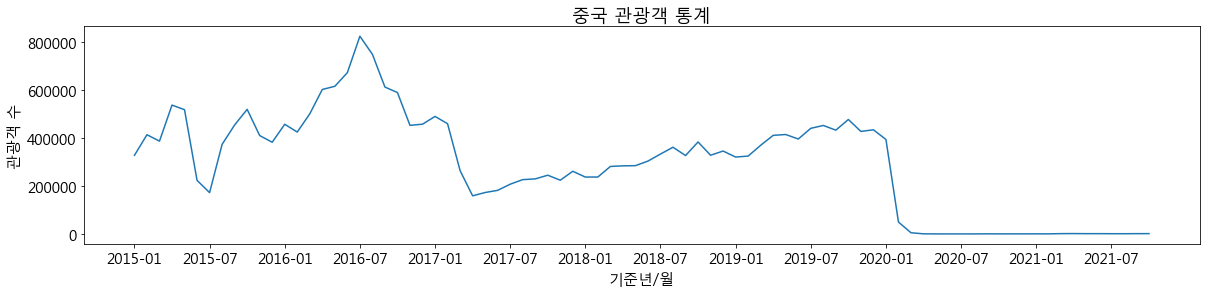

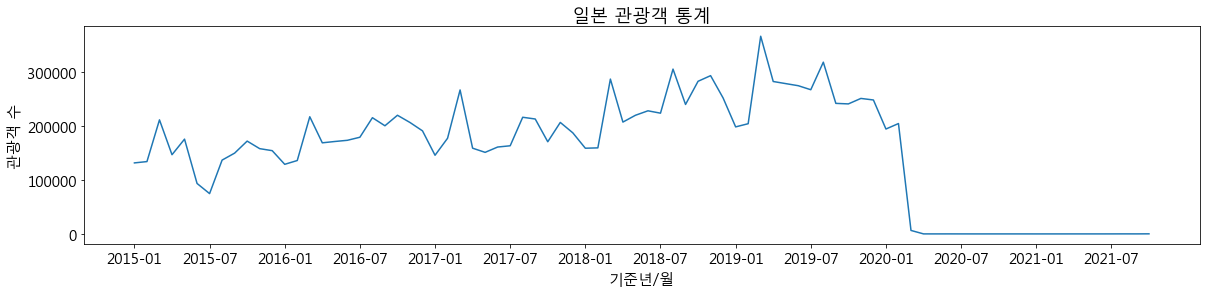

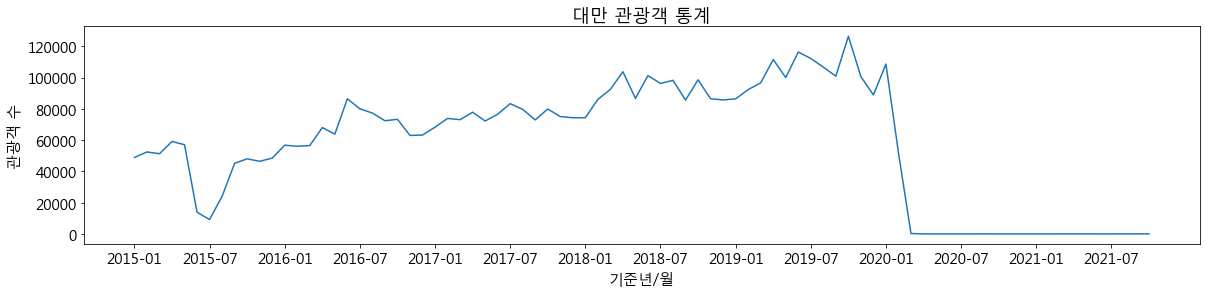

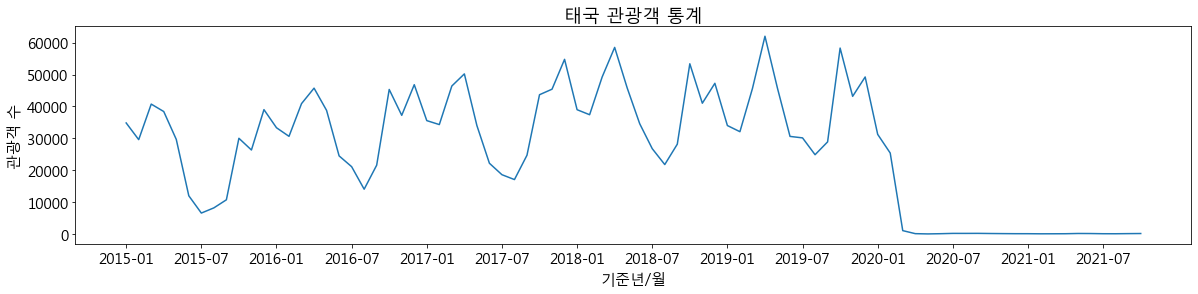

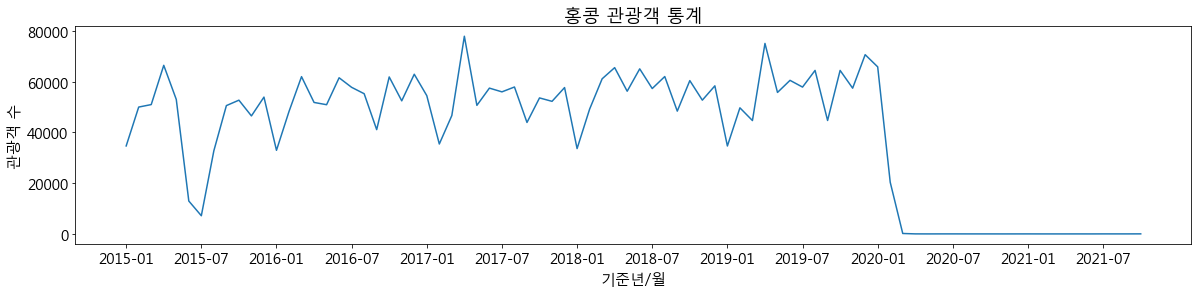

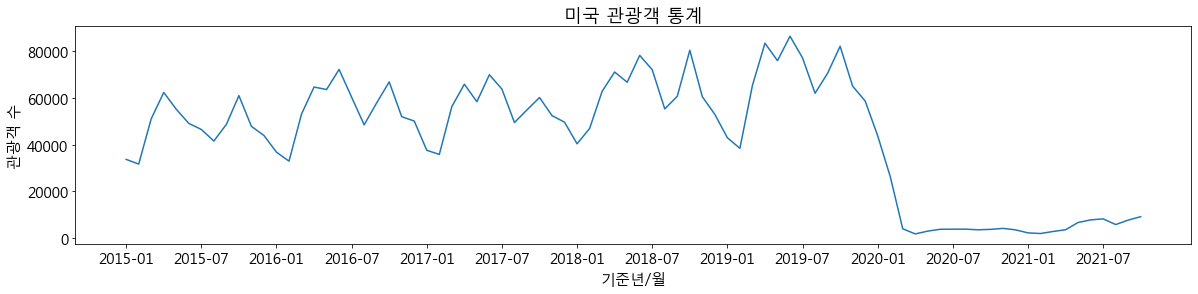

In [27]:
country_list = ['중국', '일본', '대만', '태국', '홍콩', '미국']

import numpy as np

for country in country_list:
    condition = (df['국적'] == country)
    df_filt = df[condition]
    
    plt.figure(figsize = (20, 4))
    plt.title('{} 관광객 통계'.format(country))
    plt.plot(df_filt['기준년/월'], df_filt['관광'])
    plt.xlabel('기준년/월')
    plt.ylabel('관광객 수')
    plt.xticks(['2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01', '2018-07'\
                , '2019-01', '2019-07', '2020-01', '2020-07', '2021-01', '2021-07'])
    plt.show()
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels = 

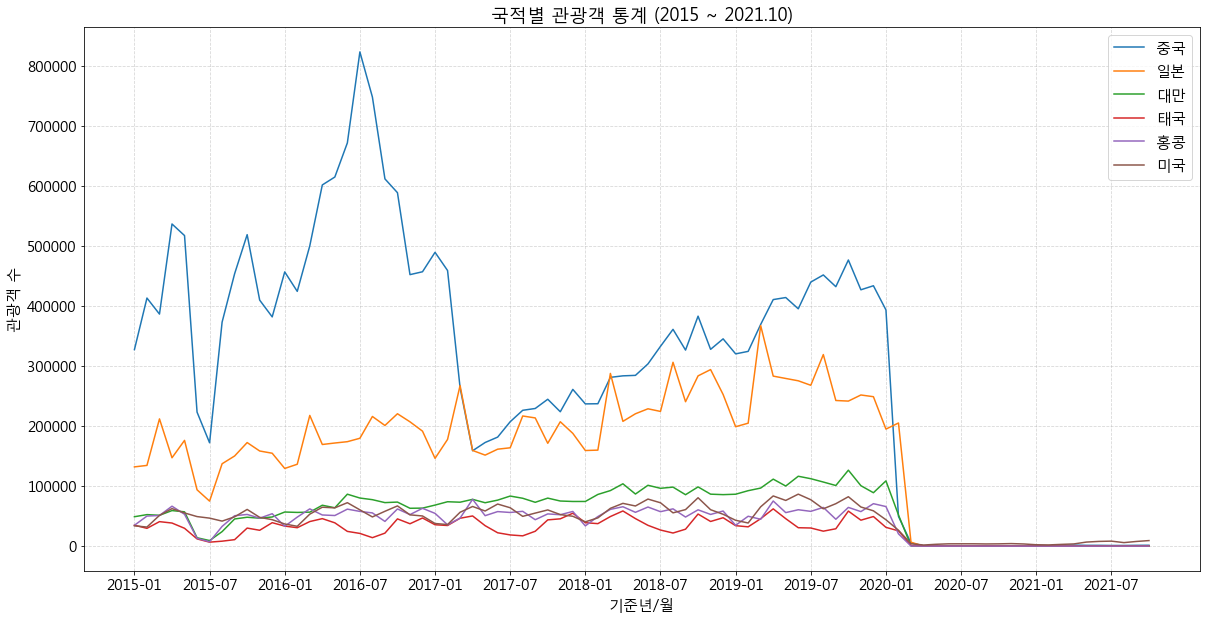

In [28]:
# 상위 6개 국가 그래프

condition = (df['국적'] == '중국')
df_china = df[condition]
condition = (df['국적'] == '일본')
df_japan = df[condition]
condition = (df['국적'] == '대만')
df_taiwan = df[condition]
condition = (df['국적'] == '태국')
df_thailand = df[condition]
condition = (df['국적'] == '홍콩')
df_hongkong = df[condition]
condition = (df['국적'] == '미국')
df_USA = df[condition]

plt.figure(figsize = (20, 10))
plt.plot(df_china['기준년/월'], df_china['관광'], label = '중국') 
plt.plot(df_japan['기준년/월'], df_japan['관광'], label = '일본')
plt.plot(df_taiwan['기준년/월'], df_taiwan['관광'], label = '대만')
plt.plot(df_thailand['기준년/월'], df_thailand['관광'], label = '태국')
plt.plot(df_hongkong['기준년/월'], df_hongkong['관광'], label = '홍콩')
plt.plot(df_USA['기준년/월'], df_USA['관광'], label = '미국')
plt.title('국적별 관광객 통계 (2015 ~ 2021.10)')
plt.xlabel('기준년/월')
plt.ylabel('관광객 수')
plt.xticks(['2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01', '2018-07'\
                , '2019-01', '2019-07', '2020-01', '2020-07', '2021-01', '2021-07'])
plt.yticks([0,100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000])
plt.legend() # 범례
plt.grid(axis = 'both', alpha = 0.5, ls = '--')
plt.show()

---
# 시각화 한 데이터 토대로 확인해보기

---
> ### 15년 여름 메르스의 영향으로 관광객의 수가 중국 포함 전반적으로 감소
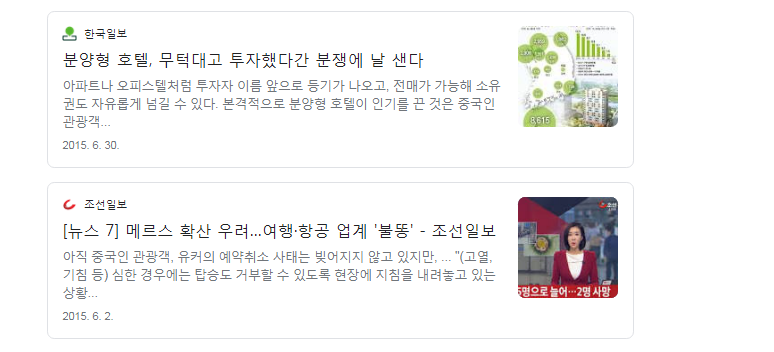

---
> ### 17년 사드 배치 보복으로 중국인 관광객 급감
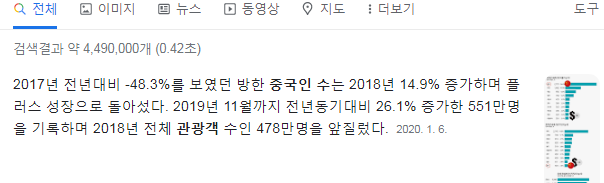

> 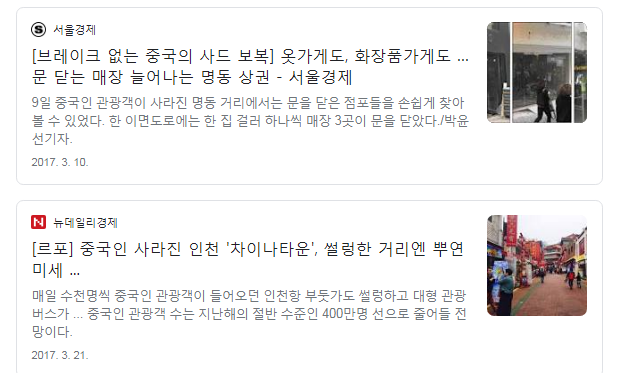

> 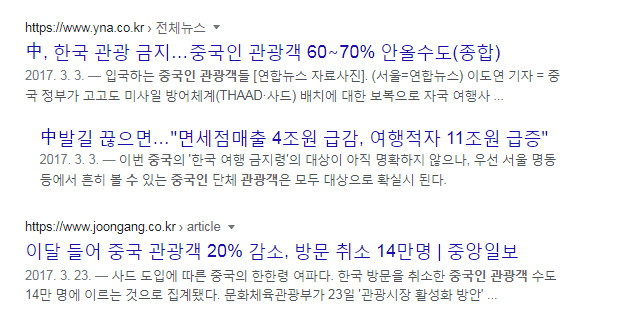

---
> ### 20년 초 코로나 여파로 관광객수 급감 시작
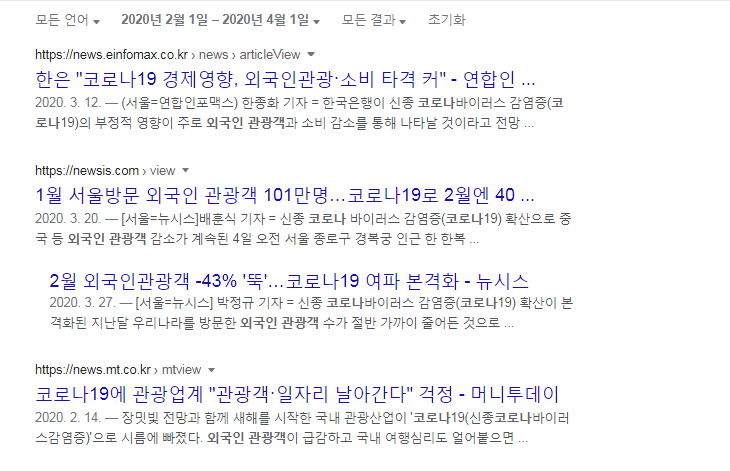

> 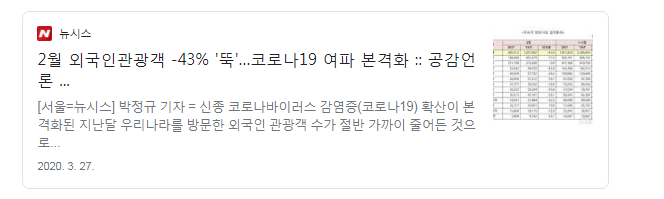